# Modeling Trials for Plagiarism Detection

Now that we have the features calculated and trainig and test sets written to csv, we can try various modeling iterations to find a good model. 

I will be using my own model testing package. [See the following repo](https://github.com/Shampjeff/Personal_Projects) for code and example usage

**Reproducability Note: To fully reproduce this work you will need `ml_test_tools_dev.py` from the repo above.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC

%load_ext autoreload
%autoreload 2

Loading my ML testing tool from local files. See note above to reproduce. 

In [2]:
out_of_pwd = True
if out_of_pwd == True:
    tools_path = '/Users/jeffshamp/Documents/GitHub/Personal_Projects/'
    if tools_path not in sys.path:
        sys.path.append(tools_path)

In [3]:
from ml_test_tools_dev import MLTestTool

We are concatonating the test and train sets together because `MLTestTool` uses cross validation to evaluate the model performance. We should expect similar results as we see here in our deployed SageMaker model endpoint. 

In [6]:
train_df= pd.read_csv("plagiarism_data/train.csv", header=None)

#test_df= pd.read_csv("plagiarism_data/test.csv", header=None)

#df= pd.concat([train_df, test_df])
# Renaming the class for usability
train_df.rename(columns={0:"class", 
                        1:"contain_1",
                        2:"contain_2",
                        3:"contain_3",
                        4:"contain_4",
                        5:"lcs_score"},inplace=True)

In [8]:
train_df.describe()

,class,contain_1,contain_2,contain_3,contain_4,lcs_score
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,0.600000,0.684620,0.420294,0.335896,0.297479,0.503953
std,0.493435,0.221285,0.342852,0.356500,0.350238,0.293922
min,0.000000,0.319672,0.030303,0.000000,0.000000,0.153025
25%,0.000000,0.514283,0.102978,0.024484,0.004308,0.238275
50%,1.000000,0.619420,0.333507,0.187781,0.111166,0.438918
75%,1.000000,0.911111,0.711317,0.635552,0.573648,0.820566
max,1.000000,1.000000,1.000000,0.988889,0.977778,1.000000


## Set Parameters for Classifiers

Recall from the previous notebook that the predictor columns are the top containment features as well as the LCS score. The target variable, `class` as renamed so that it is easier to use in testing. 

`MLTestTool` class requires the data to be loaded first as training predictors and target class. That is shown in the cell below. The tester also requires that different model instances be passed by way of parameter dictionaries. I'll define basic parameters for Support Vector (SVC) and Logistic Regression. 

In [10]:
test_ml = MLTestTool(training_df=train_df.drop("class", axis=1),
                     target=train_df["class"], 
                    include_auc=True)

In [11]:
params = {'model_instance':LogisticRegression(multi_class="auto",
                                              solver='lbfgs', 
                                             max_iter=3000)}
params_1 = {'model_instance':SVC(gamma="auto", probability=True)}
params_2 = {'model_instance':SVC(kernel="linear",gamma="auto", probability=True)}

We can now test different models by passing in their model instance and parameters.

In [12]:
test_ml.test_model(params=params)

{0: {'model_id': 0,
  'model': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=3000,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False),
  'f1_score': {'mean': 1.0, 'sd': 0.0},
  'recall': {'mean': 0.8562, 'sd': 0.141},
  'precision': {'mean': 1.0, 'sd': 0.0},
  'specificity': {'mean': 1.0, 'sd': 0.0},
  'balanced_accuracy': {'mean': 0.9281, 'sd': 0.0705},
  'accuracy': {'mean': 0.9143, 'sd': 0.0833},
  'auc': {'mean': 0.9911, 'sd': 0.0178}}}

In [13]:
test_ml.test_model(params=params_1)

{0: {'model_id': 0,
  'model': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=3000,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False),
  'f1_score': {'mean': 1.0, 'sd': 0.0},
  'recall': {'mean': 0.8562, 'sd': 0.141},
  'precision': {'mean': 1.0, 'sd': 0.0},
  'specificity': {'mean': 1.0, 'sd': 0.0},
  'balanced_accuracy': {'mean': 0.9281, 'sd': 0.0705},
  'accuracy': {'mean': 0.9143, 'sd': 0.0833},
  'auc': {'mean': 0.9911, 'sd': 0.0178}},
 1: {'model_id': 1,
  'model': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
      verbose=False),
  'f1_score': {'mean': 1.0, 'sd': 0.0},
  'recall': {'m

In [14]:
test_ml.test_model(params=params_2)

{0: {'model_id': 0,
  'model': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=3000,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False),
  'f1_score': {'mean': 1.0, 'sd': 0.0},
  'recall': {'mean': 0.8562, 'sd': 0.141},
  'precision': {'mean': 1.0, 'sd': 0.0},
  'specificity': {'mean': 1.0, 'sd': 0.0},
  'balanced_accuracy': {'mean': 0.9281, 'sd': 0.0705},
  'accuracy': {'mean': 0.9143, 'sd': 0.0833},
  'auc': {'mean': 0.9911, 'sd': 0.0178}},
 1: {'model_id': 1,
  'model': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
      verbose=False),
  'f1_score': {'mean': 1.0, 'sd': 0.0},
  'recall': {'m

These are all pretty good, but I would like to see a better accuracy than 90%. Let's try a tree boosted classifier. 

## Random Search GBM

I like random search over grid search, so we will do 100 iterations of xgb models and see what comes out. 

`MLTestTool` has a nice method call `rank_top_performers` that sorts the dictionary of results by selected mettric. I'll use accuracy since the AUC ROC scores are going to be very high for all and I want to see a gain in accuracy. 

In [15]:
import random
N_TRIALS = 200
for i in range(N_TRIALS):
    learning_rate_factor = random.randint(1, 15)
    gbm_rs = GradientBoostingClassifier(
        learning_rate=0.25 / learning_rate_factor,
        n_estimators=random.randint(20, 100),
        max_depth=random.randint(2, 15),
        min_samples_split=random.randint(2, 50),
        min_samples_leaf=random.randint(1, 50),
        subsample=1-(random.randint(0, 30)/100),
        random_state=test_ml.random_seed
    )
    test_ml.test_model({'model_instance':gbm_rs})

**Right click on the output and select the "Enable Scrolling" to reduce the length of the output.**

In [16]:
test_ml.rank_top_performers(metric='accuracy')

[{'model_id': 5,
  'model': GradientBoostingClassifier(criterion='friedman_mse', init=None,
                             learning_rate=0.020833333333333332, loss='deviance',
                             max_depth=11, max_features=None, max_leaf_nodes=None,
                             min_impurity_decrease=0.0, min_impurity_split=None,
                             min_samples_leaf=21, min_samples_split=16,
                             min_weight_fraction_leaf=0.0, n_estimators=87,
                             n_iter_no_change=None, presort='auto',
                             random_state=945945, subsample=0.97, tol=0.0001,
                             validation_fraction=0.1, verbose=0,
                             warm_start=False),
  'f1_score': {'mean': 1.0, 'sd': 0.0},
  'recall': {'mean': 0.9556, 'sd': 0.0889},
  'precision': {'mean': 1.0, 'sd': 0.0},
  'specificity': {'mean': 1.0, 'sd': 0.0},
  'balanced_accuracy': {'mean': 0.9778, 'sd': 0.0444},
  'accuracy': {'mean': 0.9714, '

Great! We have our winner and it's the boosted tree model, of course. 

In [17]:
best_model = test_ml.rank_top_performers(metric='accuracy')[0]['model']

In [18]:
best_model.get_params

<bound method BaseEstimator.get_params of GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.020833333333333332, loss='deviance',
                           max_depth=11, max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=21, min_samples_split=16,
                           min_weight_fraction_leaf=0.0, n_estimators=87,
                           n_iter_no_change=None, presort='auto',
                           random_state=945945, subsample=0.97, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)>

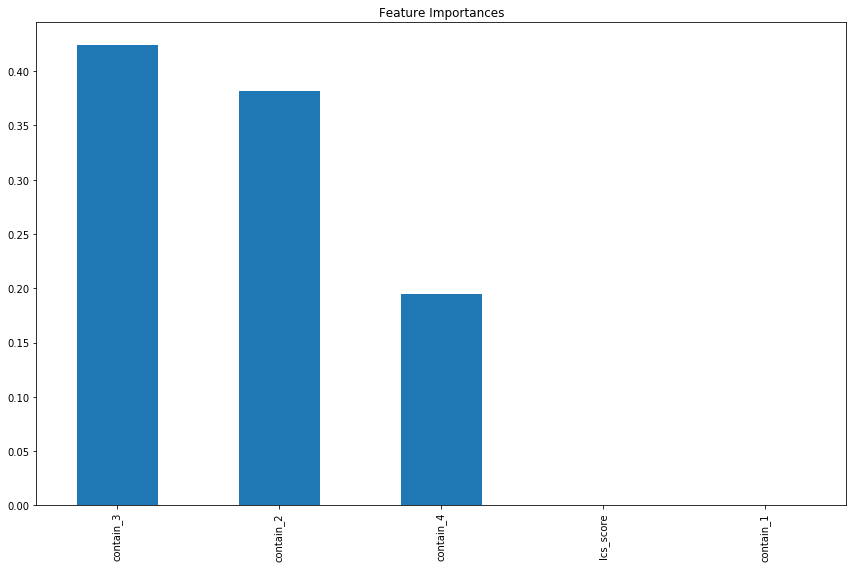

In [19]:
test_ml.plot_features_importance(best_model)

Great! We can use the parameters of the best model in SageMaker to deploy an endpoint.